In [1]:
from qiskit import IBMQ

IBMQ.load_account()
ibm_quantum = IBMQ.get_provider(project='qiskit-runtime')
backend = ibm_quantum.get_backend('ibmq_montreal')

In [12]:
import numpy as np

k = 5
state = (1/np.sqrt(8))*np.array([np.exp(-1j*2*np.pi*k*(0)/8),np.exp(-1j*2*np.pi*k*(1)/8),
                                 np.exp(-1j*2*np.pi*k*(2)/8),
 np.exp(-1j*2*np.pi*k*3/8),np.exp(-1j*2*np.pi*k*4/8),np.exp(-1j*2*np.pi*k*5/8),
 np.exp(-1j*2*np.pi*k*6/8), np.exp(-1j*2*np.pi*k*7/8)])

In [13]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector

qubits = 3 

circuit = QuantumCircuit(qubits, qubits)
circuit.initialize(state)
circuit.append(QFT(qubits),range(qubits))
circuit.measure(range(qubits),range(qubits))

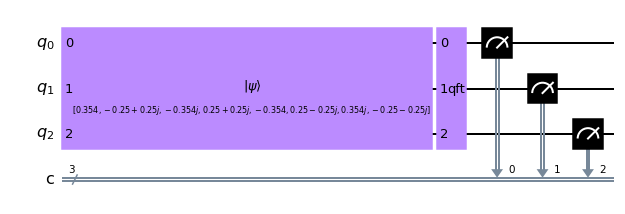

In [14]:
circuit.draw(output="mpl")

In [15]:
# Call runtime program.

runtime_inputs = {
    'circuits': circuit,
    'optimization_level': 3
}
options = {'backend_name': backend.name()}
result = ibm_quantum.runtime.run(program_id="circuit-runner",
                                 options=options,
                                 inputs=runtime_inputs,
                                ).result()

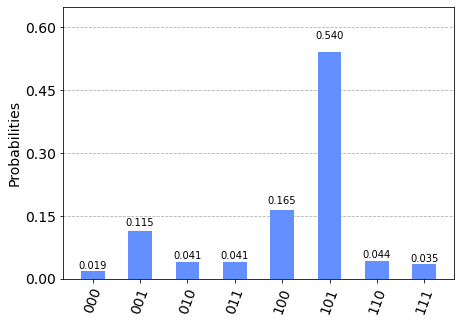

In [16]:
from qiskit.visualization import plot_histogram

counts = result.get_counts()
plot_histogram(counts)

In [10]:
result = ibm_quantum.run_circuits(circuit, backend=backend, optimization_level=3).result()

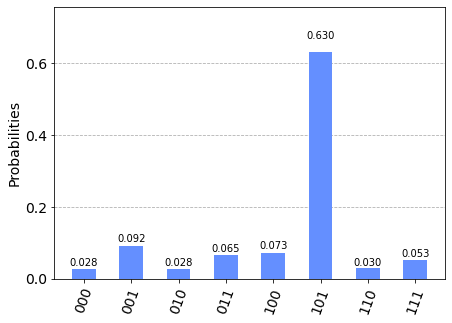

In [11]:
from qiskit.visualization import plot_histogram
plot_histogram(result.get_counts())